주성분 분석(Principal Component Analysis)  

차원(피쳐의 개수)을 줄이면서도 데이터가 퍼져있는 정도(분산)는 최대한 유지하게 만들어서 고차원 데이터를 저차원 데이터 축소하는 알고리즘을 말한다.  
주로 고차원의 데이터를 3차원 이하의 데이터로 바꿔 시각화하는데 많이 사용되며, 유용한 정보만 살려서 적은 메모리에 저장하거나 데이터의 노이즈를 줄이고 싶을 때도 사용되는 알고리즘이다.  

주성분 분석의 특징은 데이터의 분산을 최대한 유지하면서 저차원으로 데이터를 변환하는데 있다. 분산을 유지하는 이유는 데이터의 고유한 특성을 최대한 유지시키기 위해서이다.  

<img src="./images/15.png" width="1500">

<img src="./images/16.png" width="1500">

<img src="./images/17.png" width="1500">

<img src="./images/18.png" width="1500">

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

임의의 데이터셋을 만든다.

In [6]:
datas = np.array([[5 * x, 5 * (np.sqrt(1 / 3) + 0.1 * np.random.normal(0, 1)) * x] for x in np.random.normal(0, 1, 30)])
print(datas)
print('=' * 80)
n_datas = datas - np.mean(datas, axis=0)
print(n_datas)

[[ -2.3545927   -1.26923567]
 [  4.67304688   2.89205935]
 [ -5.19323959  -4.20593529]
 [  7.36719757   4.37346321]
 [ -1.1148821   -0.80603611]
 [  1.7725249    1.01186467]
 [  0.30450156   0.14898756]
 [  2.74203787   1.74412219]
 [  0.1897961    0.11268759]
 [  5.09068616   3.18257843]
 [ -1.73204459  -0.95730785]
 [-13.61615856  -7.05752457]
 [  5.12084798   2.98213678]
 [ -8.88797015  -5.82609902]
 [ -0.86356517  -0.50076462]
 [  2.95757036   1.69661154]
 [-10.31874654  -7.3229978 ]
 [  0.94615391   0.56385351]
 [ -2.13917527  -1.66502041]
 [ -6.25731948  -2.6527745 ]
 [  2.38333486   1.16330381]
 [-14.27704356  -9.56056435]
 [  5.71666211   2.82202763]
 [ -0.06934422  -0.02605518]
 [ -1.66680777  -1.051638  ]
 [ -6.66957023  -4.64197455]
 [ -1.86112132  -0.95626216]
 [  1.24958257   1.05869823]
 [-14.16918681 -10.34157057]
 [ -1.26191175  -0.46482241]]
[[-6.23301470e-01 -8.40960491e-02]
 [ 6.40433812e+00  4.07719897e+00]
 [-3.46194836e+00 -3.02079567e+00]
 [ 9.09848881e+00  5.558

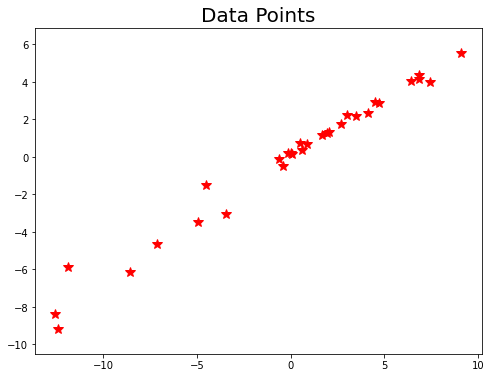

In [10]:
plt.figure(figsize=(8,6))
plt.title('Data Points', fontsize=20)
plt.plot(n_datas[:,0], n_datas[:,1],'r*', markersize=10)
plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 주로 파이 그래프 그릴 때 사용
plt.show()

In [12]:
# 내적
A = np.array([[1,2], [3,4]])
print(A)
B = np.array([[1,-2], [2,3]])
print(B)
print(np.dot(A,B))
print(np.matmul(A,B)) # numpy에만 있는 내적 연산자
print(A @ B) # numpy에만 있는 내적 연산자

[[1 2]
 [3 4]]
[[ 1 -2]
 [ 2  3]]
[[ 5  4]
 [11  6]]
[[ 5  4]
 [11  6]]
[[ 5  4]
 [11  6]]


In [27]:
# x축으로 사영하면 y좌표는 무시되고 x좌표만 남게된다.
# np.array([1,0]) => 1행만 있으므로 행 벡터
print(np.dot(n_datas, np.array([1,0]))) 
print('=' * 80)
# np.array([1,0]).reshape(2,1) => 1행 2열이 2행 1열로 변환 => 1열만 있으므로 열 벡터
print(np.dot(n_datas, np.array([1,0]).reshape(2,1))) 
print('=' * 80)
# np.array([[1],[0]]) => 2행 1열 => 1열만 있으므로 열 벡터
print(np.dot(n_datas, np.array([[1],[0]])))

[-6.23301470e-01  6.40433812e+00 -3.46194836e+00  9.09848881e+00
  6.16409139e-01  3.50381613e+00  2.03579279e+00  4.47332910e+00
  1.92108733e+00  6.82197739e+00 -7.53359419e-04 -1.18848673e+01
  6.85213921e+00 -7.15667892e+00  8.67726060e-01  4.68886160e+00
 -8.58745530e+00  2.67744514e+00 -4.07884036e-01 -4.52602825e+00
  4.11462609e+00 -1.25457523e+01  7.44795334e+00  1.66194701e+00
  6.44834676e-02 -4.93827900e+00 -1.29830089e-01  2.98087381e+00
 -1.24378956e+01  4.69379480e-01]
[[-6.23301470e-01]
 [ 6.40433812e+00]
 [-3.46194836e+00]
 [ 9.09848881e+00]
 [ 6.16409139e-01]
 [ 3.50381613e+00]
 [ 2.03579279e+00]
 [ 4.47332910e+00]
 [ 1.92108733e+00]
 [ 6.82197739e+00]
 [-7.53359419e-04]
 [-1.18848673e+01]
 [ 6.85213921e+00]
 [-7.15667892e+00]
 [ 8.67726060e-01]
 [ 4.68886160e+00]
 [-8.58745530e+00]
 [ 2.67744514e+00]
 [-4.07884036e-01]
 [-4.52602825e+00]
 [ 4.11462609e+00]
 [-1.25457523e+01]
 [ 7.44795334e+00]
 [ 1.66194701e+00]
 [ 6.44834676e-02]
 [-4.93827900e+00]
 [-1.29830089e-01

In [38]:
# x축으로 사영하면 y좌표는 무시되고 x좌표만 남게된다.
proj_xaxis = np.dot(n_datas, np.array([1,0]))
print(n_datas, np.array([1,0]))
print('=' * 80)
proj_xaxis2 = np.dot(proj_xaxis.reshape(-1, 1), np.array([[1,0]]))
print(proj_xaxis.reshape(-1, 1), np.array([[1,0]]))
print('=' * 80)
print(proj_xaxis2)

[[-6.23301470e-01 -8.40960491e-02]
 [ 6.40433812e+00  4.07719897e+00]
 [-3.46194836e+00 -3.02079567e+00]
 [ 9.09848881e+00  5.55860282e+00]
 [ 6.16409139e-01  3.79103506e-01]
 [ 3.50381613e+00  2.19700429e+00]
 [ 2.03579279e+00  1.33412718e+00]
 [ 4.47332910e+00  2.92926181e+00]
 [ 1.92108733e+00  1.29782721e+00]
 [ 6.82197739e+00  4.36771805e+00]
 [-7.53359419e-04  2.27831770e-01]
 [-1.18848673e+01 -5.87238495e+00]
 [ 6.85213921e+00  4.16727639e+00]
 [-7.15667892e+00 -4.64095940e+00]
 [ 8.67726060e-01  6.84374995e-01]
 [ 4.68886160e+00  2.88175116e+00]
 [-8.58745530e+00 -6.13785818e+00]
 [ 2.67744514e+00  1.74899313e+00]
 [-4.07884036e-01 -4.79880792e-01]
 [-4.52602825e+00 -1.46763488e+00]
 [ 4.11462609e+00  2.34844343e+00]
 [-1.25457523e+01 -8.37542473e+00]
 [ 7.44795334e+00  4.00716725e+00]
 [ 1.66194701e+00  1.15908444e+00]
 [ 6.44834676e-02  1.33501616e-01]
 [-4.93827900e+00 -3.45683493e+00]
 [-1.29830089e-01  2.28877463e-01]
 [ 2.98087381e+00  2.24383785e+00]
 [-1.24378956e+01 -9

In [24]:
# reshape(-1, n): 열의 개수는 n개로 고정하고 행은 상황에 따라 적절히 만든다.
print(proj_xaxis.reshape(-1, 1)) # proj_xaxis.reshape(30, 1)와 같은 표현이다.

[[-6.23301470e-01  6.40433812e+00]
 [-3.46194836e+00  9.09848881e+00]
 [ 6.16409139e-01  3.50381613e+00]
 [ 2.03579279e+00  4.47332910e+00]
 [ 1.92108733e+00  6.82197739e+00]
 [-7.53359419e-04 -1.18848673e+01]
 [ 6.85213921e+00 -7.15667892e+00]
 [ 8.67726060e-01  4.68886160e+00]
 [-8.58745530e+00  2.67744514e+00]
 [-4.07884036e-01 -4.52602825e+00]
 [ 4.11462609e+00 -1.25457523e+01]
 [ 7.44795334e+00  1.66194701e+00]
 [ 6.44834676e-02 -4.93827900e+00]
 [-1.29830089e-01  2.98087381e+00]
 [-1.24378956e+01  4.69379480e-01]]


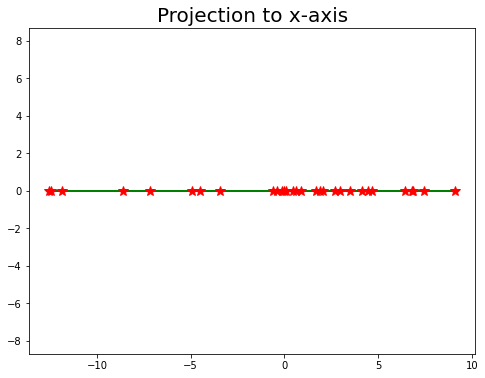

In [34]:
plt.figure(figsize=(8,6))
plt.title('Projection to x-axis', fontsize=20)
plt.plot(proj_xaxis2[:,0], proj_xaxis2[:,1],'g-')
plt.plot(proj_xaxis2[:,0], proj_xaxis2[:,1],'r*', markersize=10)
plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 주로 파이 그래프 그릴 때 사용
plt.show()

In [43]:
proj_line = np.dot(n_datas, np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
print(n_datas, np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
print('=' * 80)
proj_line2 = np.dot(proj_line.reshape(-1,1), np.array([[np.cos(np.pi / 6), np.sin(np.pi / 6)]]))
print(proj_line.reshape(-1,1), np.array([[np.cos(np.pi / 6), np.sin(np.pi / 6)]]))
print('=' * 80)
print(proj_line2)

[[-6.23301470e-01 -8.40960491e-02]
 [ 6.40433812e+00  4.07719897e+00]
 [-3.46194836e+00 -3.02079567e+00]
 [ 9.09848881e+00  5.55860282e+00]
 [ 6.16409139e-01  3.79103506e-01]
 [ 3.50381613e+00  2.19700429e+00]
 [ 2.03579279e+00  1.33412718e+00]
 [ 4.47332910e+00  2.92926181e+00]
 [ 1.92108733e+00  1.29782721e+00]
 [ 6.82197739e+00  4.36771805e+00]
 [-7.53359419e-04  2.27831770e-01]
 [-1.18848673e+01 -5.87238495e+00]
 [ 6.85213921e+00  4.16727639e+00]
 [-7.15667892e+00 -4.64095940e+00]
 [ 8.67726060e-01  6.84374995e-01]
 [ 4.68886160e+00  2.88175116e+00]
 [-8.58745530e+00 -6.13785818e+00]
 [ 2.67744514e+00  1.74899313e+00]
 [-4.07884036e-01 -4.79880792e-01]
 [-4.52602825e+00 -1.46763488e+00]
 [ 4.11462609e+00  2.34844343e+00]
 [-1.25457523e+01 -8.37542473e+00]
 [ 7.44795334e+00  4.00716725e+00]
 [ 1.66194701e+00  1.15908444e+00]
 [ 6.44834676e-02  1.33501616e-01]
 [-4.93827900e+00 -3.45683493e+00]
 [-1.29830089e-01  2.28877463e-01]
 [ 2.98087381e+00  2.24383785e+00]
 [-1.24378956e+01 -9

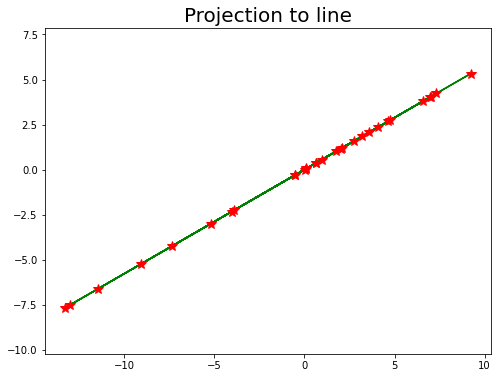

In [45]:
plt.figure(figsize=(8,6))
plt.title('Projection to line', fontsize=20)
plt.plot(proj_line2[:,0], proj_line2[:,1],'g-')
plt.plot(proj_line2[:,0], proj_line2[:,1],'r*', markersize=10)
plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다. 주로 파이 그래프 그릴 때 사용
plt.show()

In [46]:
# 표준편차가 큰게 데이터 과학 입장에서는 데이터의 분포를 잘 보존하고 있다고 생각할 수 있다.
print(np.std(proj_xaxis2)) # x축
print(np.std(proj_line2)) # 임의의 설정한 선
# 임의로 설정한 선의 표준편차가 크므로 x축 보다는 임의의 선으로 정사영 하는 것이 좋다.

4.098192740067854
4.849581965461871


공분산(Covariance)

두 집단의 상호 연관성(상관 관계)을 측정하는 도구로 X에서 X의 기대값(평균)을 뺀 편차에서 Y에서 Y의 기대값을 뺀 편차의 곱에 대한 기대값으로 계산한다.

$$E((X - E(X))(Y - E(Y)))$$

$x = \{x_1, x_2, \ldots, x_n\}$ 이고 $y = \{y_1, y_2, \ldots, y_n\}$ 일 때 $x$와 $y$의 공분산은 아래와 같이 계산한다.

$$\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y) $$
$n-1$로 계산하는 이융는 표본에 대한 분산이기 때문이다. 모집단에 대해서 공분산을 계산할 때는 n으로 계산한다.  

$Z = \begin{bmatrix} x_1 & x_2 & \cdots x_n \\ y_1 & y_2 & \cdots y_n \end{bmatrix}$ 이고  $\mu_x = \mu_y=0$일 경우 공분산 행렬은 $\Sigma =\begin{bmatrix} {\rm Var}(x) & {\rm Cov}(x,y) \\ {\rm Cov}(y,x) & {\rm Var}(y) \end{bmatrix}$와 같이 계산할 수 있고 $ ZZ^T = \begin{bmatrix} \langle x, x\rangle  &\langle x, y \rangle \\ \langle y, x \rangle &\langle y, y \rangle \end{bmatrix}$와 비례한다.

In [53]:
print((n_datas.T @ n_datas) / 29)
# ddof(delta degrees of freedom, 자유도)는 ddof=0이면 N으로 나누는 것이고, ddof=1이면 (N-1)로 나누는 것이다.
print(np.var(n_datas[:,0], ddof=1))
print(np.cov(n_datas.T, ddof=1))

[[34.748656   21.98648443]
 [21.98648443 14.22602466]]
34.74865600292041
[[34.748656   21.98648443]
 [21.98648443 14.22602466]]


PCA 예제1

In [57]:
sigma = n_datas.T @ n_datas # 공분산 행렬
# linalg.eig() 메소드는 공분산 행렬을 인수로 넘겨받아 고유값과 고유 벡터로 이루어진 행렬을 계산해 리턴한다.
las, evs = np.linalg.eig(sigma)
print(las) # 고유값, 피쳐가 2개이기 때문에 고유값이 2개가 나온다.
# 고유 벡터 행렬의 첫 번째 열 벡터가 첫 번째 고유값에 두 번째 열 벡터가 두 번재 고유값에 대응된다.
# 원래 특성의 x값에 열 벡터의 첫 번째 값을 곱하고 y 값에 열 벡터의 두 번째 값을 곱한 특성을 새로운 특성으로 사용하면 데이터의 분포를 거의 유지하면서 1차원으로 데이터를 나타낼 수 있다는 의미이다.
print(evs) # 고유 벡터 행렬

[1413.76400973    6.50172942]
[[ 0.84348024 -0.5371602 ]
 [ 0.5371602   0.84348024]]


In [60]:
u1 = evs[:,0] # 첫 번째 특성 벡터
print(u1)
print('=' * 80)
proj_u1 = np.dot(n_datas, u1) # 원래 데이터와 첫 번재 특성 벡터 내적
print(proj_u1)

[0.84348024 0.5371602 ]
[-5.70915524e-01  7.59204168e+00 -4.54273625e+00  1.06602558e+01
  7.23568245e-01  4.13554294e+00  2.43379102e+00  5.34664757e+00
  2.31754033e+00  8.10036744e+00  1.21746716e-01 -1.31790622e+01
  8.01813906e+00 -8.52945595e+00  1.09952880e+00  5.50292415e+00
 -1.05403620e+01  3.19786158e+00 -6.01814989e-01 -4.60597044e+00
  4.73209616e+00 -1.50810390e+01  8.43469225e+00  2.02443350e+00
  1.26102286e-01 -6.02221491e+00  1.34347500e-02  3.71960855e+00
 -1.54095895e+01  7.82838057e-01]


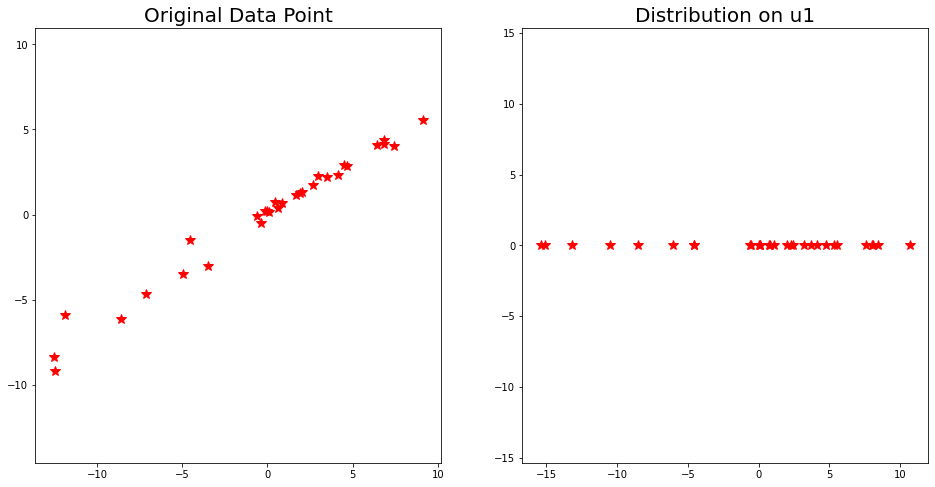

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Original Data Point', fontsize=20)
plt.plot(n_datas[:,0], n_datas[:,1],'r*', markersize=10)
plt.axis('equal')
plt.subplot(1,2,2)
plt.title('Distribution on u1', fontsize=20)
plt.plot(proj_u1, np.zeros_like(proj_u1),'r*', markersize=10)
plt.axis('equal')
plt.show()

In [68]:
# 임의로 만든 선에 사영한 것 보다 고유 벡터를 사용해서 사영한 것의 분산이 조금 더 큰 것을 볼 수 있다.
print(np.std(proj_line))
print(np.std(proj_u1))

6.858344587396149
6.864799122414071


PCA 예제2

In [70]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [71]:
data_ex = digits.data[0]
data_ex

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

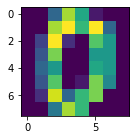

target value: 0


In [76]:
data_ex = data_ex.reshape(8, 8)
plt.figure(figsize=(2,2))
plt.imshow(data_ex)
plt.show()
print('target value: {}'.format(digits.target[0]))

In [87]:
X = digits.data.copy()
X = X.T # 행렬을 전치하여 각 특징 벡터를 열 벡터로 만든다.
X = X - np.mean(X, axis=1).reshape(-1,1) # 브로드캐스팅을 이용해 평균이 0이 되도록 해서 중심을 맞춘다.
sigma = np.dot(X, X.T) # 공분산 행렬
las, evs = np.linalg.eig(sigma) # 고유값과 고유 벡터를 계산한다.
# 고유값이 클수록 더 많은 특성을 설명할 수 있는 피쳐이다.
print(las[:6])
# 처음 고유값 2개를 더한 값이 전체 고유값의 합 중에서 28.5%를 차지하므로 피쳐를 2개만 사용하더라도 전체 데이터의 분산을 28.5%를 보존하고 있음을 알 수 있다.
print(sum(las[:2]) / sum(las))

[321496.44645596 294037.07339949 254652.03660974 181576.27386432
 124845.64540141 106158.91069579]
0.285093648236993


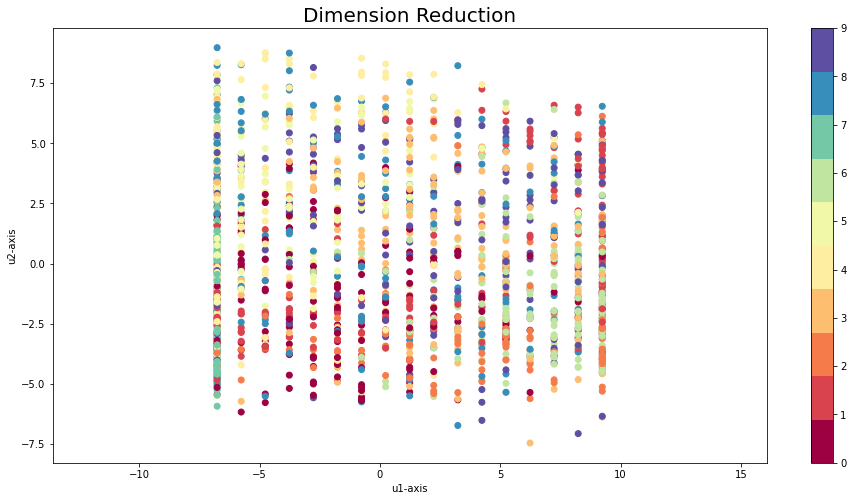

In [92]:
first_components = np.dot(evs[0], X)
second_components = np.dot(evs[1], X)

plt.figure(figsize=(16,8))
plt.title('Dimension Reduction', fontsize=20)
plt.scatter(first_components, second_components, c=digits.target, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('u1-axis')
plt.ylabel('u2-axis')
plt.axis('equal')
plt.colorbar() # 오른쪽 컬러바
plt.show()